In [1]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import inconsistencies_util

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df_to_test = df.copy()

df_to_test = sanity_checks_methods.drop_inconsistencies(df_to_test)
df = sanity_checks_methods.drop_inconsistencies(df)

adding 10% of inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 0
Percentage of inconsistencies in age and married features: 0.00%
Number of inconsistencies in age and workType features: 0
Percentage of inconsistencies in age and workType features: 0.00%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
0.0

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 951
Percentage of inconsistencies in age and married features: 10.00%
Number of inconsistencies in age and workType features: 951
Percentage of inconsistencies in age and workType features: 10.00%
Number of abnormal values: 951
Percentage of abnormal values: 10.00%

TOTAL INCONSISTENCY PERCENTAGE
29.993692178301096

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision    

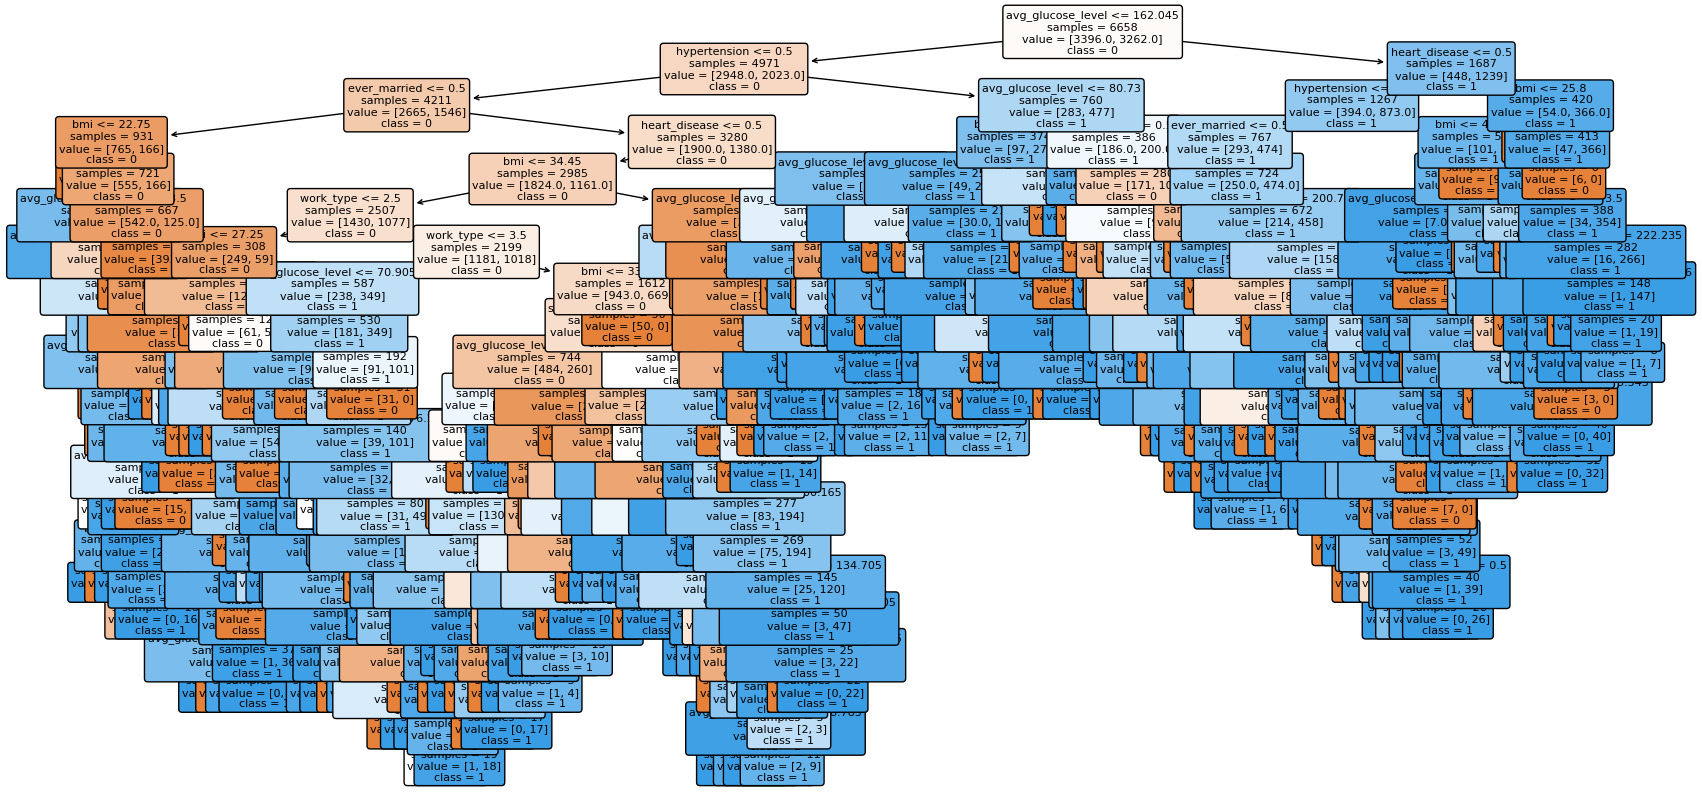

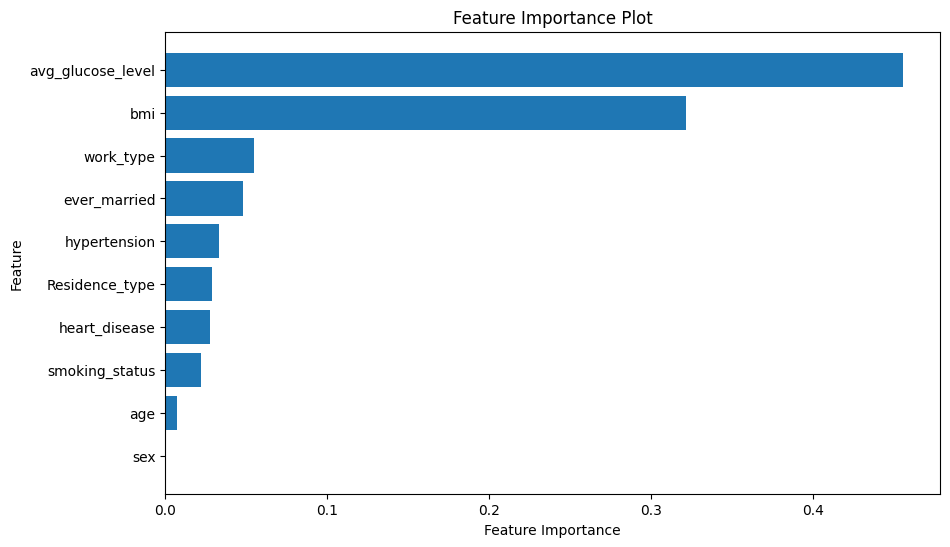

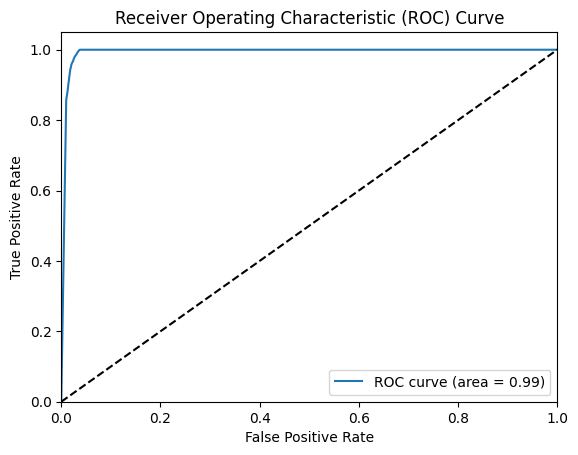

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9930793493558454
Accuracy for each fold: [0.948948948948949, 0.9564564564564565, 0.9414414414414415, 0.9714714714714715, 0.9519519519519519, 0.954954954954955, 0.963963963963964, 0.948948948948949, 0.9428571428571428, 0.9593984962406015]
Mean accuracy: 0.9540393777235883
95% confidence interval: (0.9473895562419224, 0.9606891992052541)


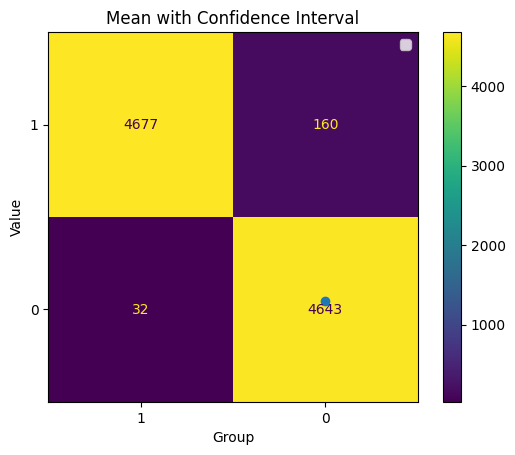


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 29.170265913009644
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.1, 'max_depth': 7, 'max_iter': 251, 'min_samples_leaf': 1}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3396
           1       1.00      1.00      1.00      3262

    accuracy                           1.00      6658
   macro avg       1.00      1.00      1.00      6658
weighted avg       1.00      1.00      1.00      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1441
           1       0.96      0.96      0.96      1413

    accuracy                           0.96      2854
   macro avg       0

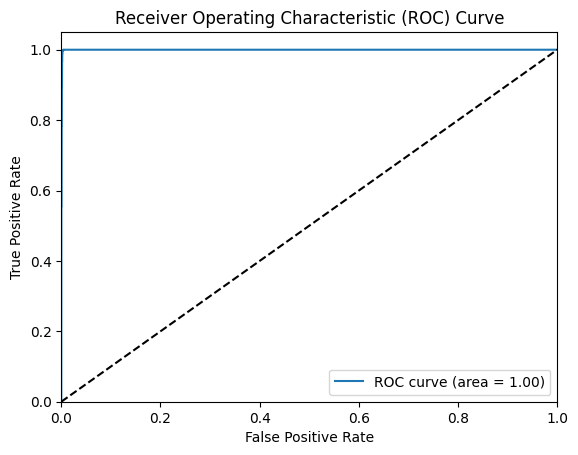

AUC Score: 0.999498208440066


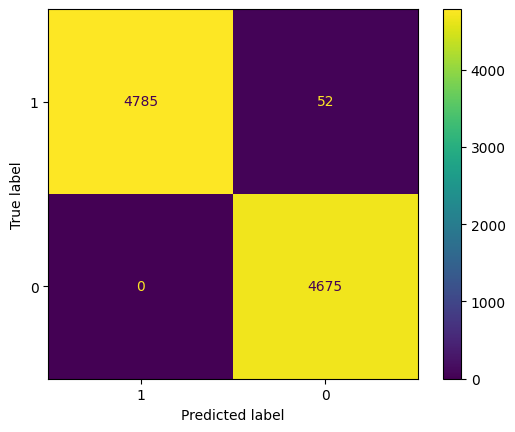

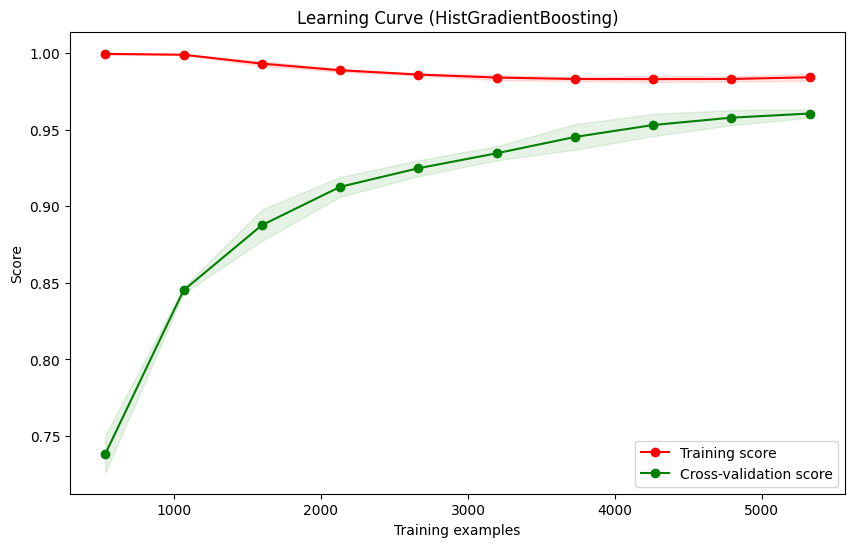

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.975975975975976, 0.9804804804804805, 0.9834834834834835, 0.9864864864864865, 0.9819819819819819, 0.987987987987988, 0.990990990990991, 0.984984984984985, 0.9864661654135338, 0.9909774436090225]
Mean accuracy: 0.9849815981394929
95% confidence interval: (0.9816248086002826, 0.9883383876787033)


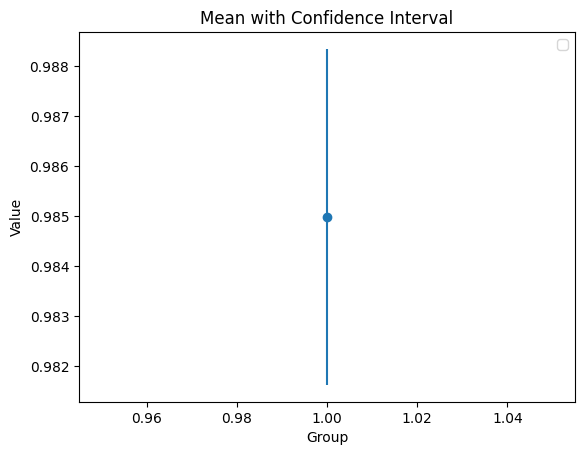


ORIGINAL VALUES RESTORED


In [2]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 10)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 30% of inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 852
Percentage of inconsistencies in age and married features: 8.96%
Number of inconsistencies in age and workType features: 852
Percentage of inconsistencies in age and workType features: 8.96%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
17.91421362489487

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 2853
Percentage of inconsistencies in age and married features: 29.99%
Number of inconsistencies in age and workType features: 2853
Percentage of inconsistencies in age and workType features: 29.99%
Number of abnormal values: 2853
Percentage of abnormal values: 29.99%

TOTAL INCONSISTENCY PERCENTAGE
89.98107653490328

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
       

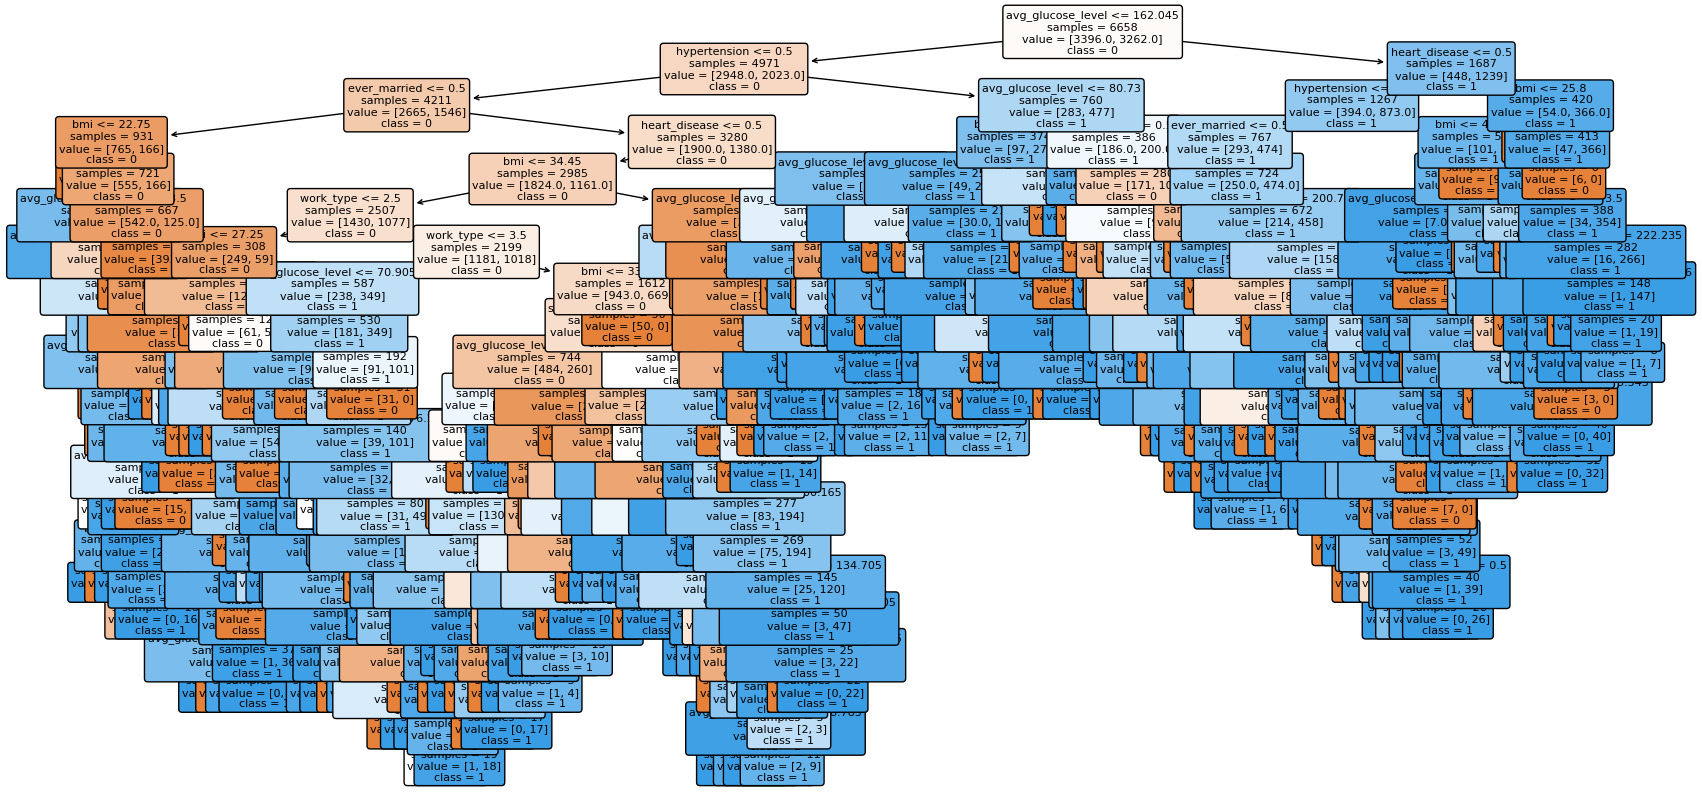

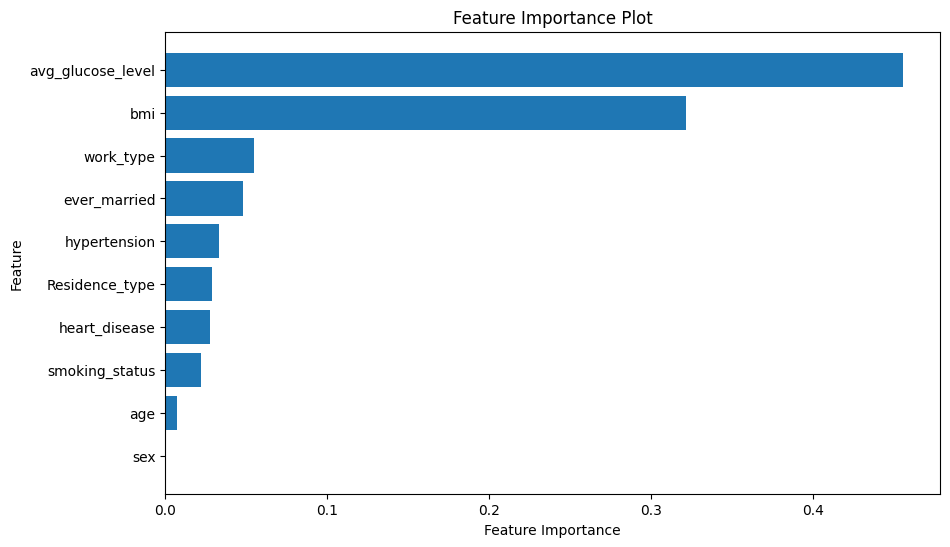

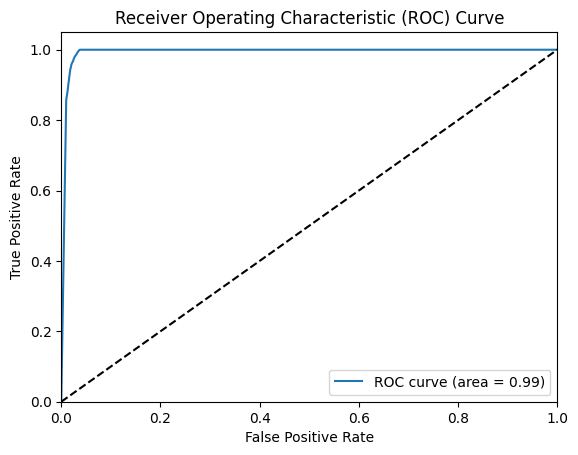

AUC Score: 0.9930793493558454
Accuracy for each fold: [0.9504504504504504, 0.9534534534534534, 0.9324324324324325, 0.9564564564564565, 0.9324324324324325, 0.93993993993994, 0.93993993993994, 0.9429429429429429, 0.9609022556390977, 0.9609022556390977]
Mean accuracy: 0.9469852559326244
95% confidence interval: (0.93918492330976, 0.9547855885554888)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


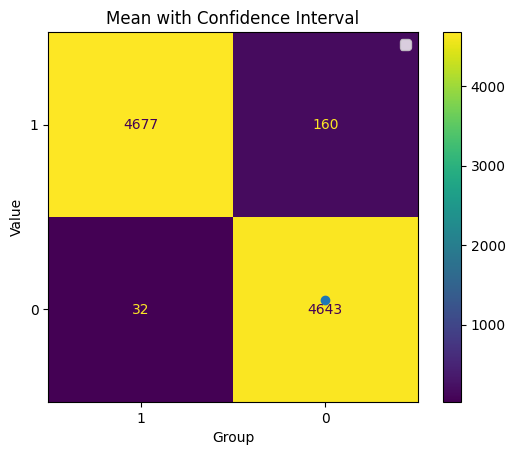


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 37.726808071136475
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.3, 'max_depth': 9, 'max_iter': 467, 'min_samples_leaf': 6}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3396
           1       1.00      1.00      1.00      3262

    accuracy                           1.00      6658
   macro avg       1.00      1.00      1.00      6658
weighted avg       1.00      1.00      1.00      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.88      0.98      0.92      1441
           1       0.97      0.86      0.91      1413

    accuracy                           0.92      2854
   macro avg       0

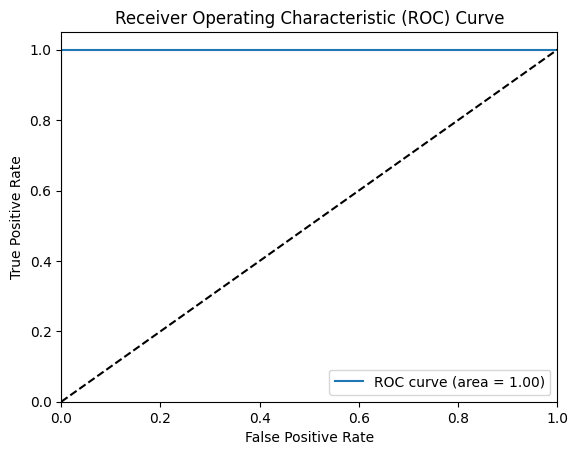

AUC Score: 0.9999035509480729


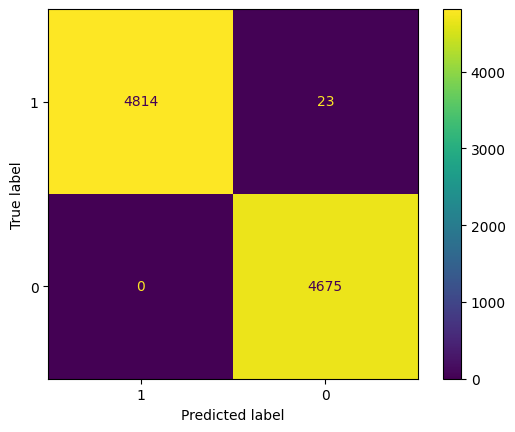

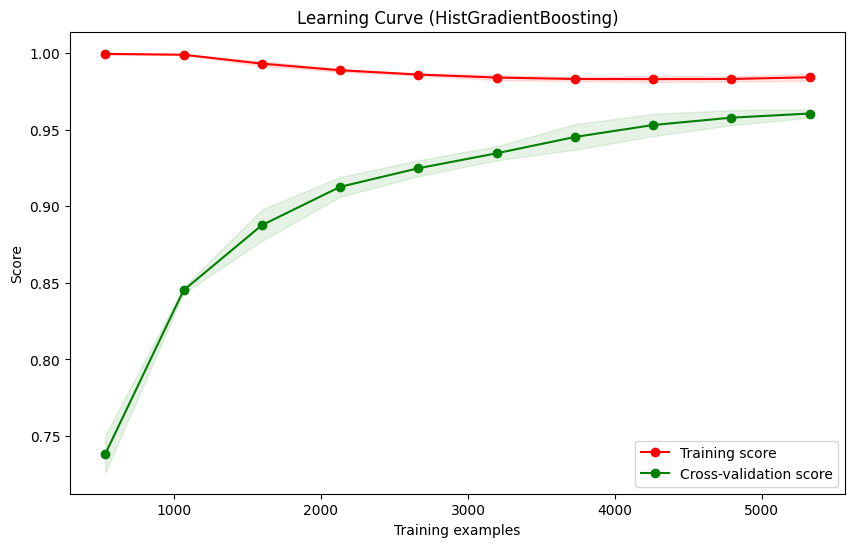

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.990990990990991, 0.9834834834834835, 0.9864864864864865, 0.9924924924924925, 0.9894894894894894, 0.984984984984985, 0.9894894894894894, 0.996996996996997, 0.9924812030075187, 0.9924812030075187]
Mean accuracy: 0.9899376820429451
95% confidence interval: (0.9870279011300601, 0.99284746295583)


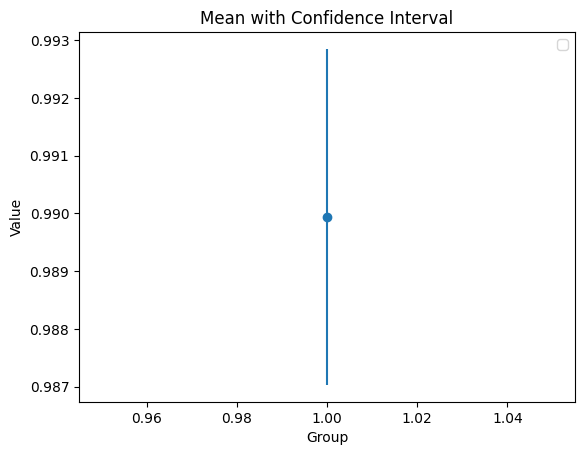


ORIGINAL VALUES RESTORED


In [3]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 30)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 50% inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 2529
Percentage of inconsistencies in age and married features: 26.59%
Number of inconsistencies in age and workType features: 2529
Percentage of inconsistencies in age and workType features: 26.59%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
53.174936921783015

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 4756
Percentage of inconsistencies in age and married features: 50.00%
Number of inconsistencies in age and workType features: 4756
Percentage of inconsistencies in age and workType features: 50.00%
Number of abnormal values: 4756
Percentage of abnormal values: 50.00%

TOTAL INCONSISTENCY PERCENTAGE
150.0

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              

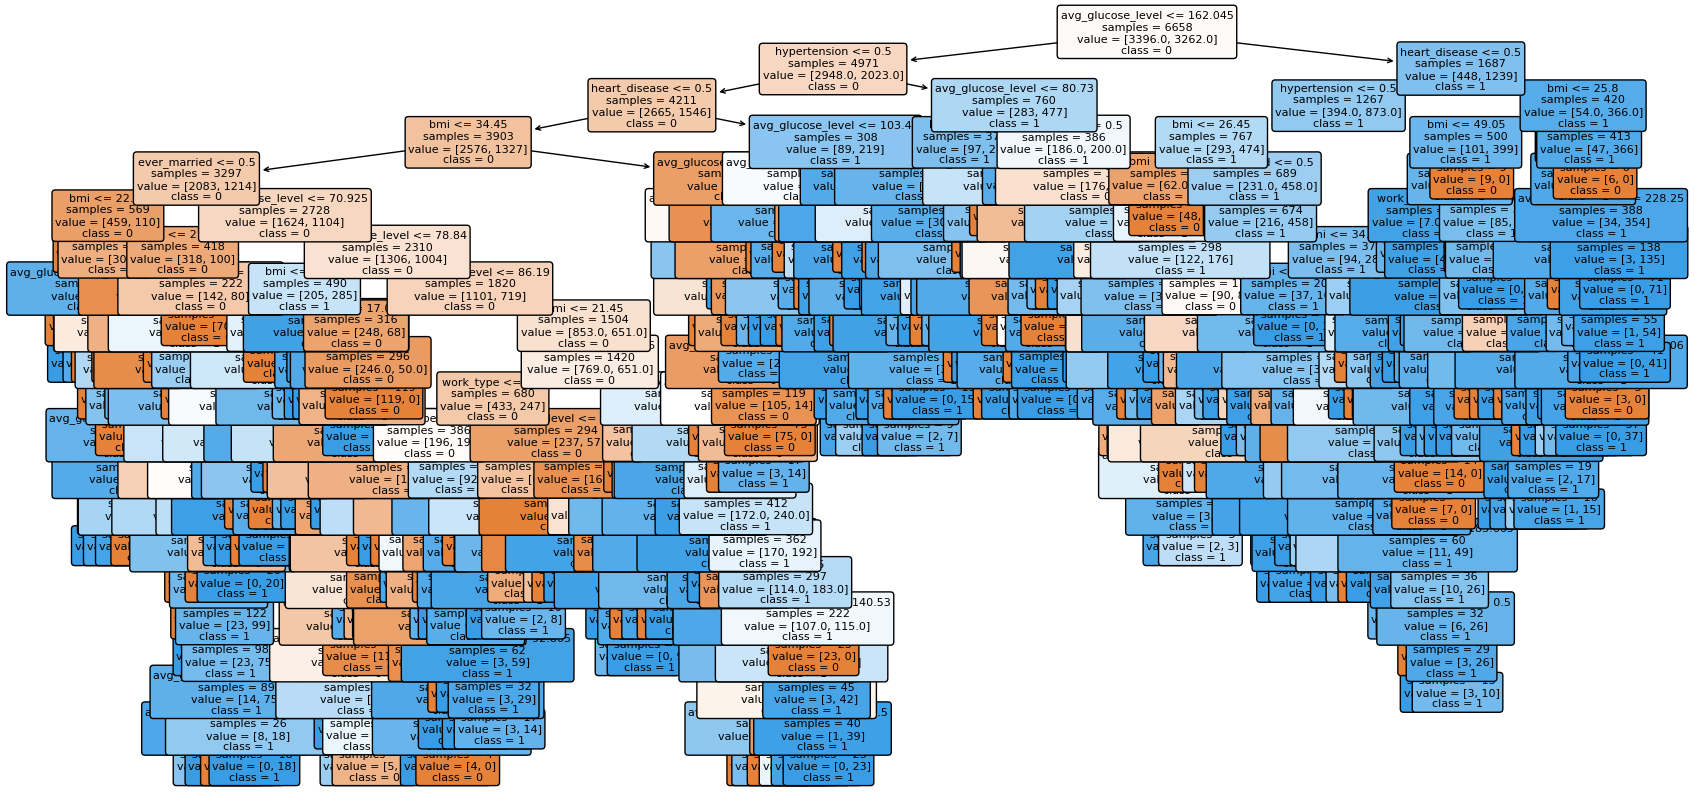

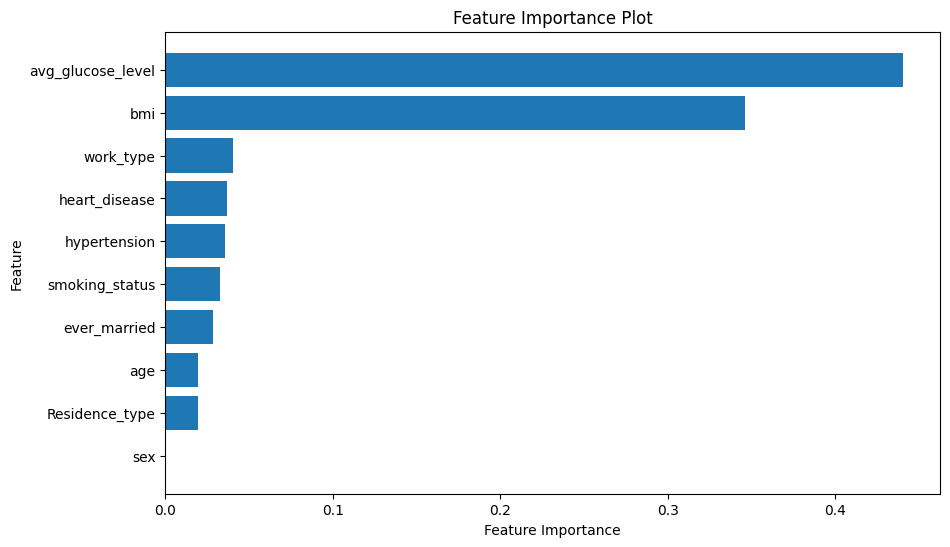

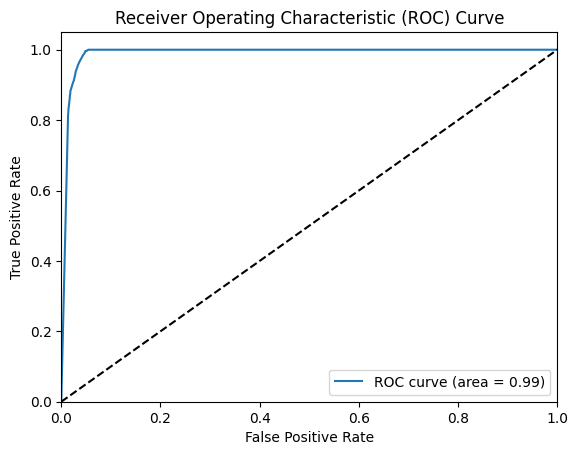

AUC Score: 0.989595398217174
Accuracy for each fold: [0.9294294294294294, 0.9354354354354354, 0.933933933933934, 0.9219219219219219, 0.9594594594594594, 0.9219219219219219, 0.9474474474474475, 0.9369369369369369, 0.9443609022556391, 0.9233082706766917]
Mean accuracy: 0.9354155659418817
95% confidence interval: (0.9266413587200599, 0.9441897731637034)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


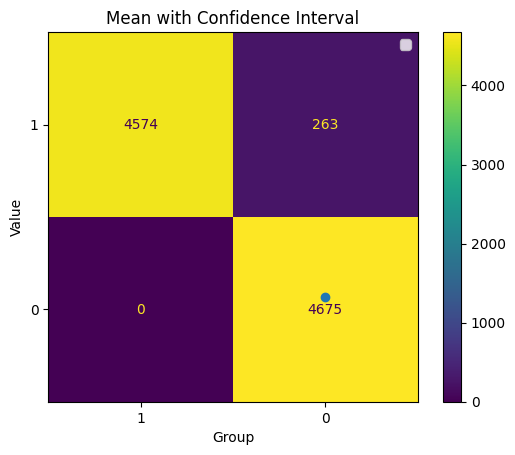


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 39.419421911239624
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.3, 'max_depth': 7, 'max_iter': 431, 'min_samples_leaf': 3}
Best score on training data:  0.9969329850900515
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3396
           1       1.00      1.00      1.00      3262

    accuracy                           1.00      6658
   macro avg       1.00      1.00      1.00      6658
weighted avg       1.00      1.00      1.00      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1441
           1       0.98      1.00      0.99      1413

    accuracy                           0.99      2854
   ma

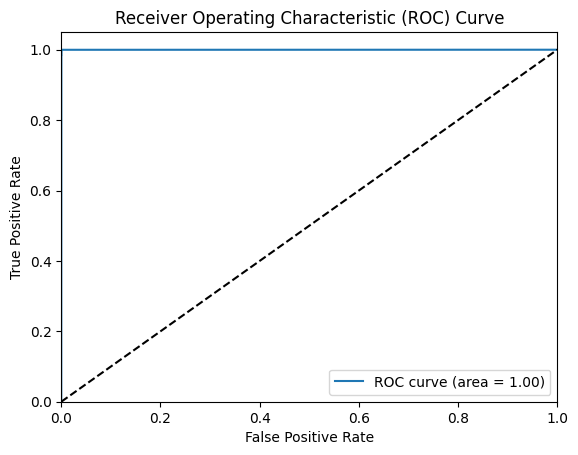

AUC Score: 0.9999820457060603


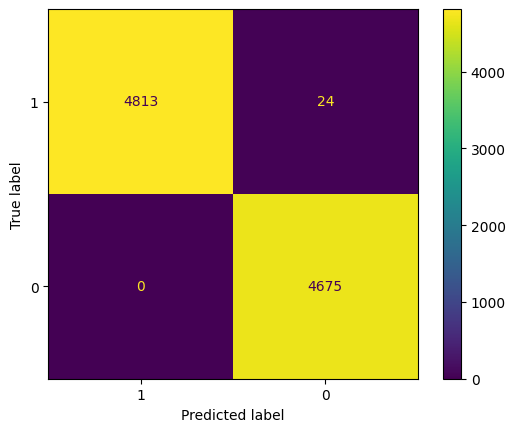

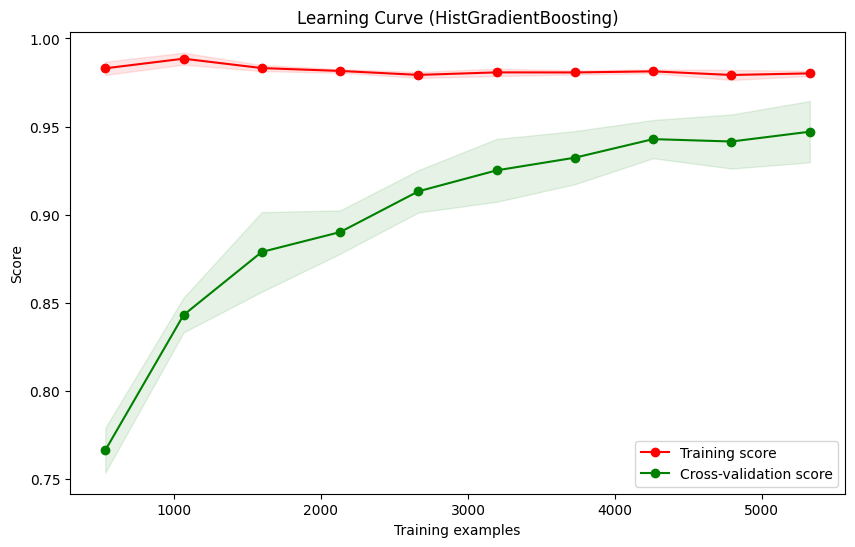

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.993993993993994, 0.984984984984985, 0.9864864864864865, 0.984984984984985, 0.990990990990991, 0.9894894894894894, 0.993993993993994, 0.9864864864864865, 0.9924812030075187, 0.9834586466165414]
Mean accuracy: 0.988735126103547
95% confidence interval: (0.985902822839718, 0.991567429367376)


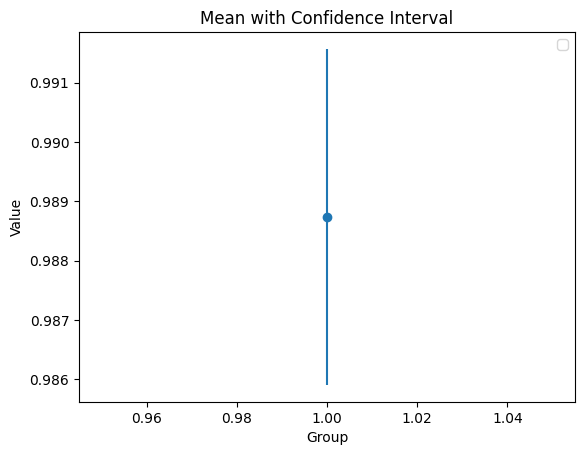


ORIGINAL VALUES RESTORED


In [4]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 50)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 100% inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 0
Percentage of inconsistencies in age and married features: 0.00%
Number of inconsistencies in age and workType features: 0
Percentage of inconsistencies in age and workType features: 0.00%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
0.0

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 3170
Percentage of inconsistencies in age and married features: 33.33%
Number of inconsistencies in age and workType features: 3170
Percentage of inconsistencies in age and workType features: 33.33%
Number of abnormal values: 3170
Percentage of abnormal values: 33.33%

TOTAL INCONSISTENCY PERCENTAGE
99.97897392767031

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision  

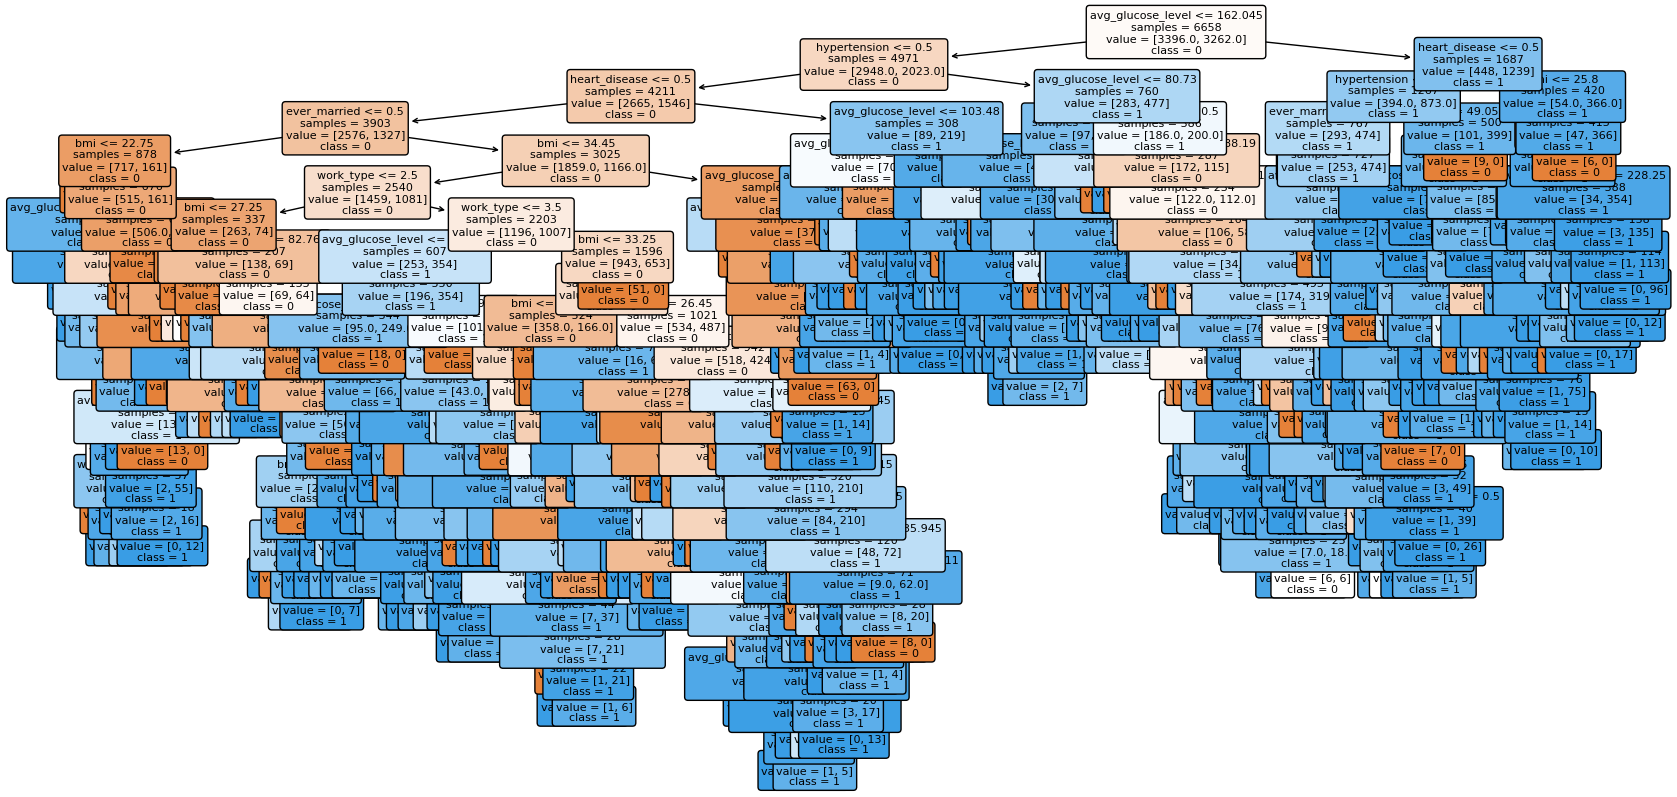

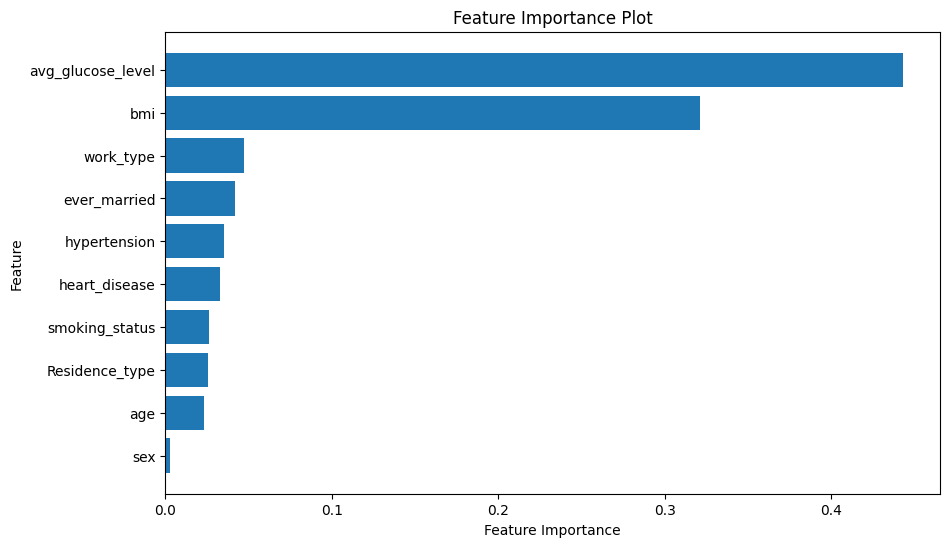

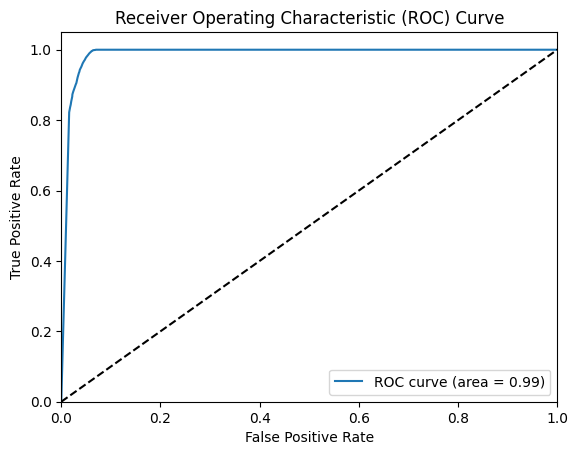

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9875861093022921
Accuracy for each fold: [0.9519519519519519, 0.9564564564564565, 0.9204204204204204, 0.9384384384384384, 0.9474474474474475, 0.9414414414414415, 0.9384384384384384, 0.9324324324324325, 0.9503759398496241, 0.9473684210526315]
Mean accuracy: 0.9424771387929283
95% confidence interval: (0.9348716582443236, 0.9500826193415329)


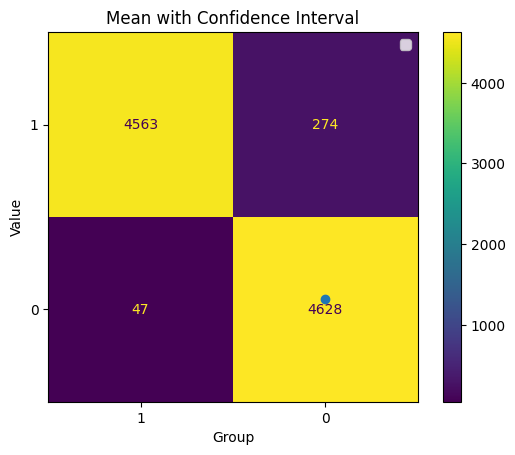


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 50.295740604400635
Best parameters found:  {'l2_regularization': 0.1, 'learning_rate': 0.2, 'max_depth': 8, 'max_iter': 484, 'min_samples_leaf': 4}
Best score on training data:  0.9960122699386502
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3396
           1       1.00      1.00      1.00      3262

    accuracy                           1.00      6658
   macro avg       1.00      1.00      1.00      6658
weighted avg       1.00      1.00      1.00      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      1441
           1       0.97      0.98      0.97      1413

    accuracy                           0.97      2854
   ma

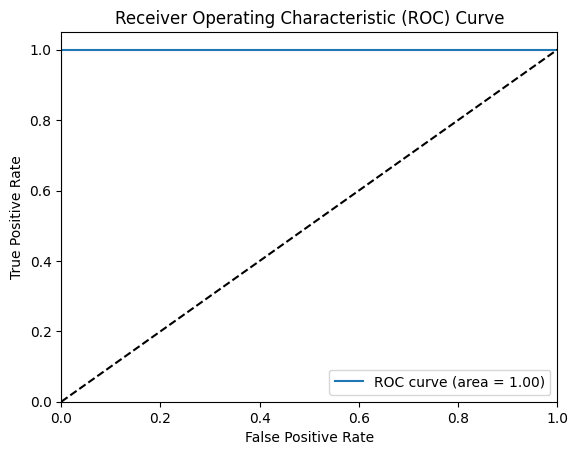

AUC Score: 0.9999968602096805


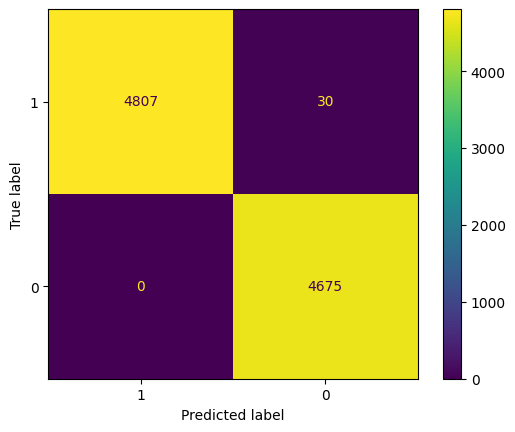

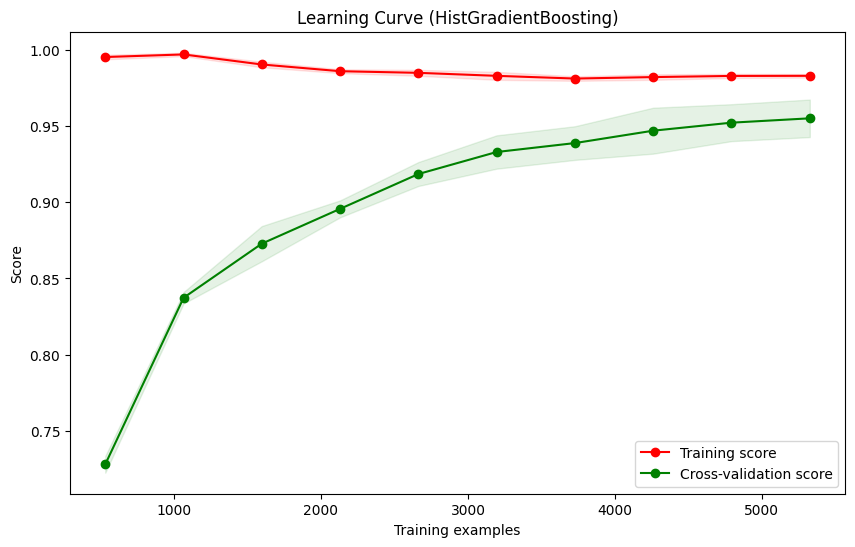

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.9864864864864865, 0.9894894894894894, 0.9894894894894894, 0.9924924924924925, 0.9864864864864865, 0.993993993993994, 0.9924924924924925, 0.984984984984985, 0.9939849624060151, 0.9864661654135338]
Mean accuracy: 0.9896367043735464
95% confidence interval: (0.9871841639329588, 0.9920892448141341)


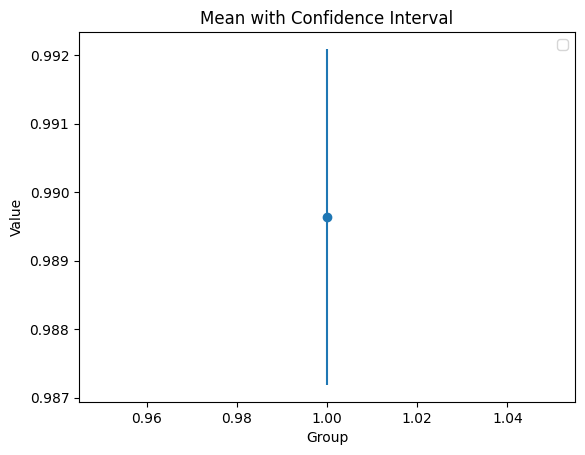


ORIGINAL VALUES RESTORED


In [2]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 100)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree,df)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df, df_to_test)
ML_algorithms.k_fold_cross_validation_dt(hgb,df) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

Dropping inconsistencies features


 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Training Set:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      3396
           1       0.96      0.99      0.98      3262

    accuracy                           0.98      6658
   macro avg       0.98      0.98      0.98      6658
weighted avg       0.98      0.98      0.98      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      1441
           1       0.94      1.00      0.96      1413

    accuracy                           0.96      2854
   macro avg       0.97      0.96      0.96      2854
weighted avg       0.97      0.96      0.96      2854

Classification Report on Test Set - original:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4837
           1     

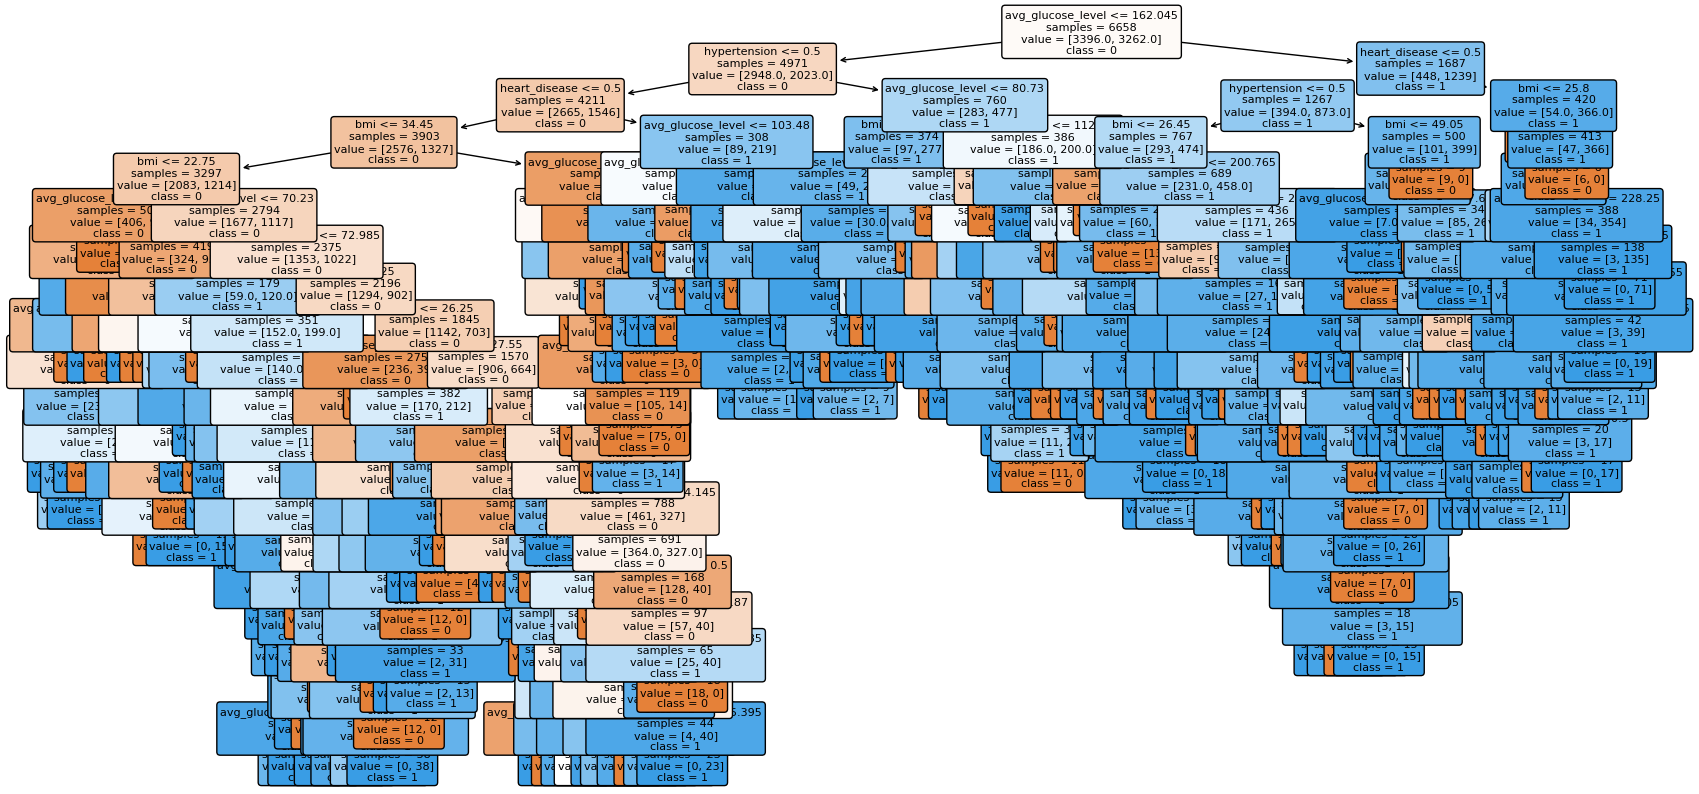

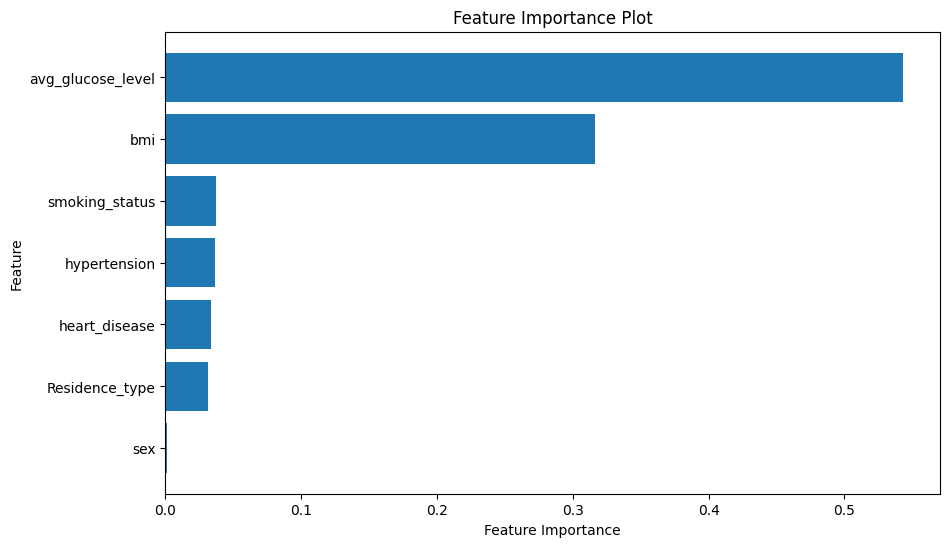

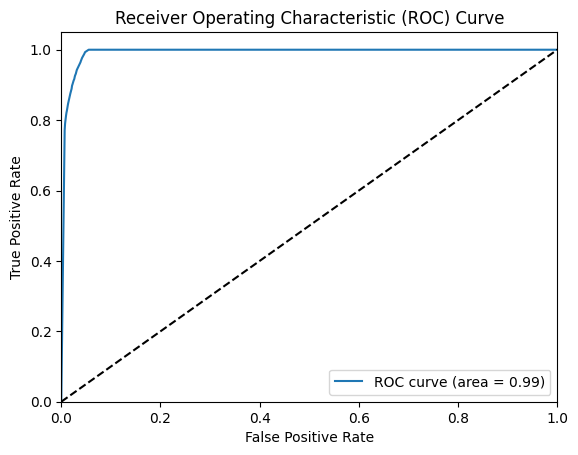

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.992185880009154
Accuracy for each fold: [0.9669669669669669, 0.963963963963964, 0.9594594594594594, 0.9579579579579579, 0.9519519519519519, 0.9654654654654654, 0.9594594594594594, 0.924924924924925, 0.9518796992481203, 0.9609022556390977]
Mean accuracy: 0.956293210503737
95% confidence interval: (0.947619117767412, 0.9649673032400619)


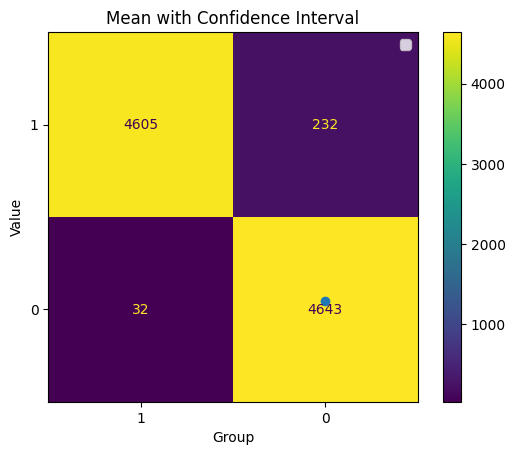


 PRINT HGB PREDICTIONS AND RESULTS
---------------------------------------------------
Fitting 5 folds for each of 50 candidates, totalling 250 fits
search time: 26.175095319747925
Best parameters found:  {'l2_regularization': 0.2, 'learning_rate': 0.2, 'max_depth': 7, 'max_iter': 283, 'min_samples_leaf': 12}
Best score on training data:  1.0
Classification Report on Training Set - dirty:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3396
           1       1.00      1.00      1.00      3262

    accuracy                           1.00      6658
   macro avg       1.00      1.00      1.00      6658
weighted avg       1.00      1.00      1.00      6658

Classification Report on Test Set - dirty:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1441
           1       0.98      1.00      0.99      1413

    accuracy                           0.99      2854
   macro avg       

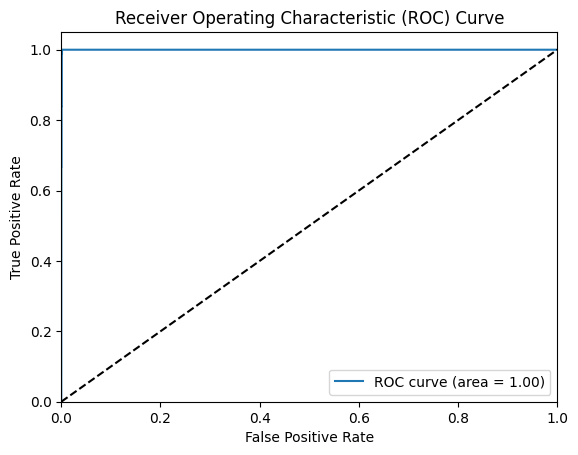

AUC Score: 0.9996562814048129


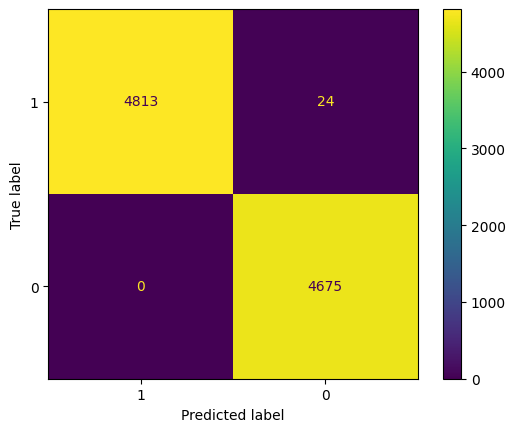

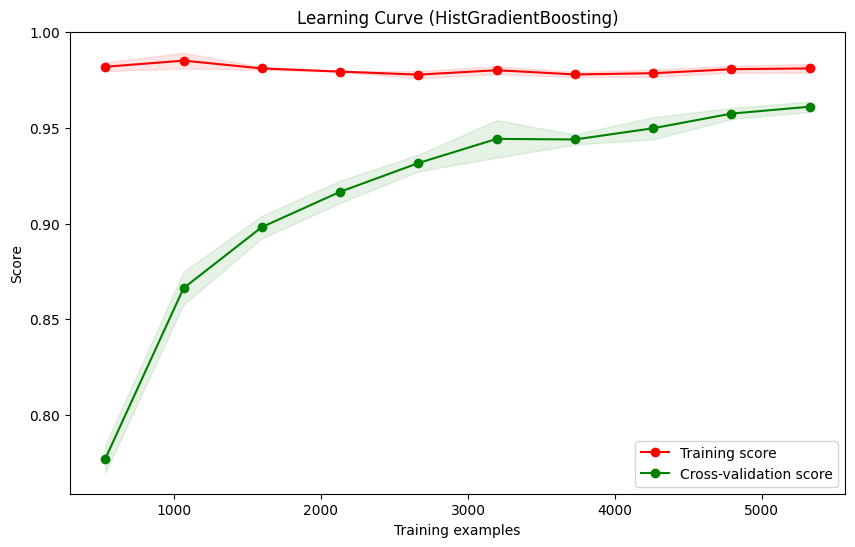

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.990990990990991, 0.987987987987988, 0.990990990990991, 0.9894894894894894, 0.987987987987988, 0.990990990990991, 0.9864864864864865, 0.9774774774774775, 0.98796992481203, 0.9894736842105263]
Mean accuracy: 0.9879846011424958
95% confidence interval: (0.9851207757858267, 0.9908484264991648)


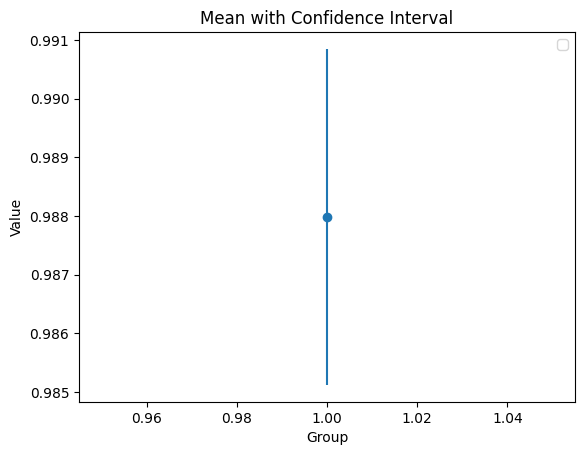

In [4]:
# Drop the columns from the training data
df_train = df.drop(['age', 'work_type', 'ever_married'], axis=1)

# Drop the columns from the test data
df_test = df_to_test.drop(['age', 'work_type', 'ever_married'], axis=1)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
decision_tree = ML_algorithms.train_decision_tree_model(df_train, df_test)
ML_algorithms.k_fold_cross_validation_dt(decision_tree, df_train)
    
print('\n PRINT HGB PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
hgb = ML_algorithms.train_hist_gradient_boosting_model(df_train, df_test)
ML_algorithms.k_fold_cross_validation_dt(hgb, df_train) 
